In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [2]:
wineData = pd.read_csv('winequality-red.csv')
wineData.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
wineData.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [4]:
wineData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
wineData.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


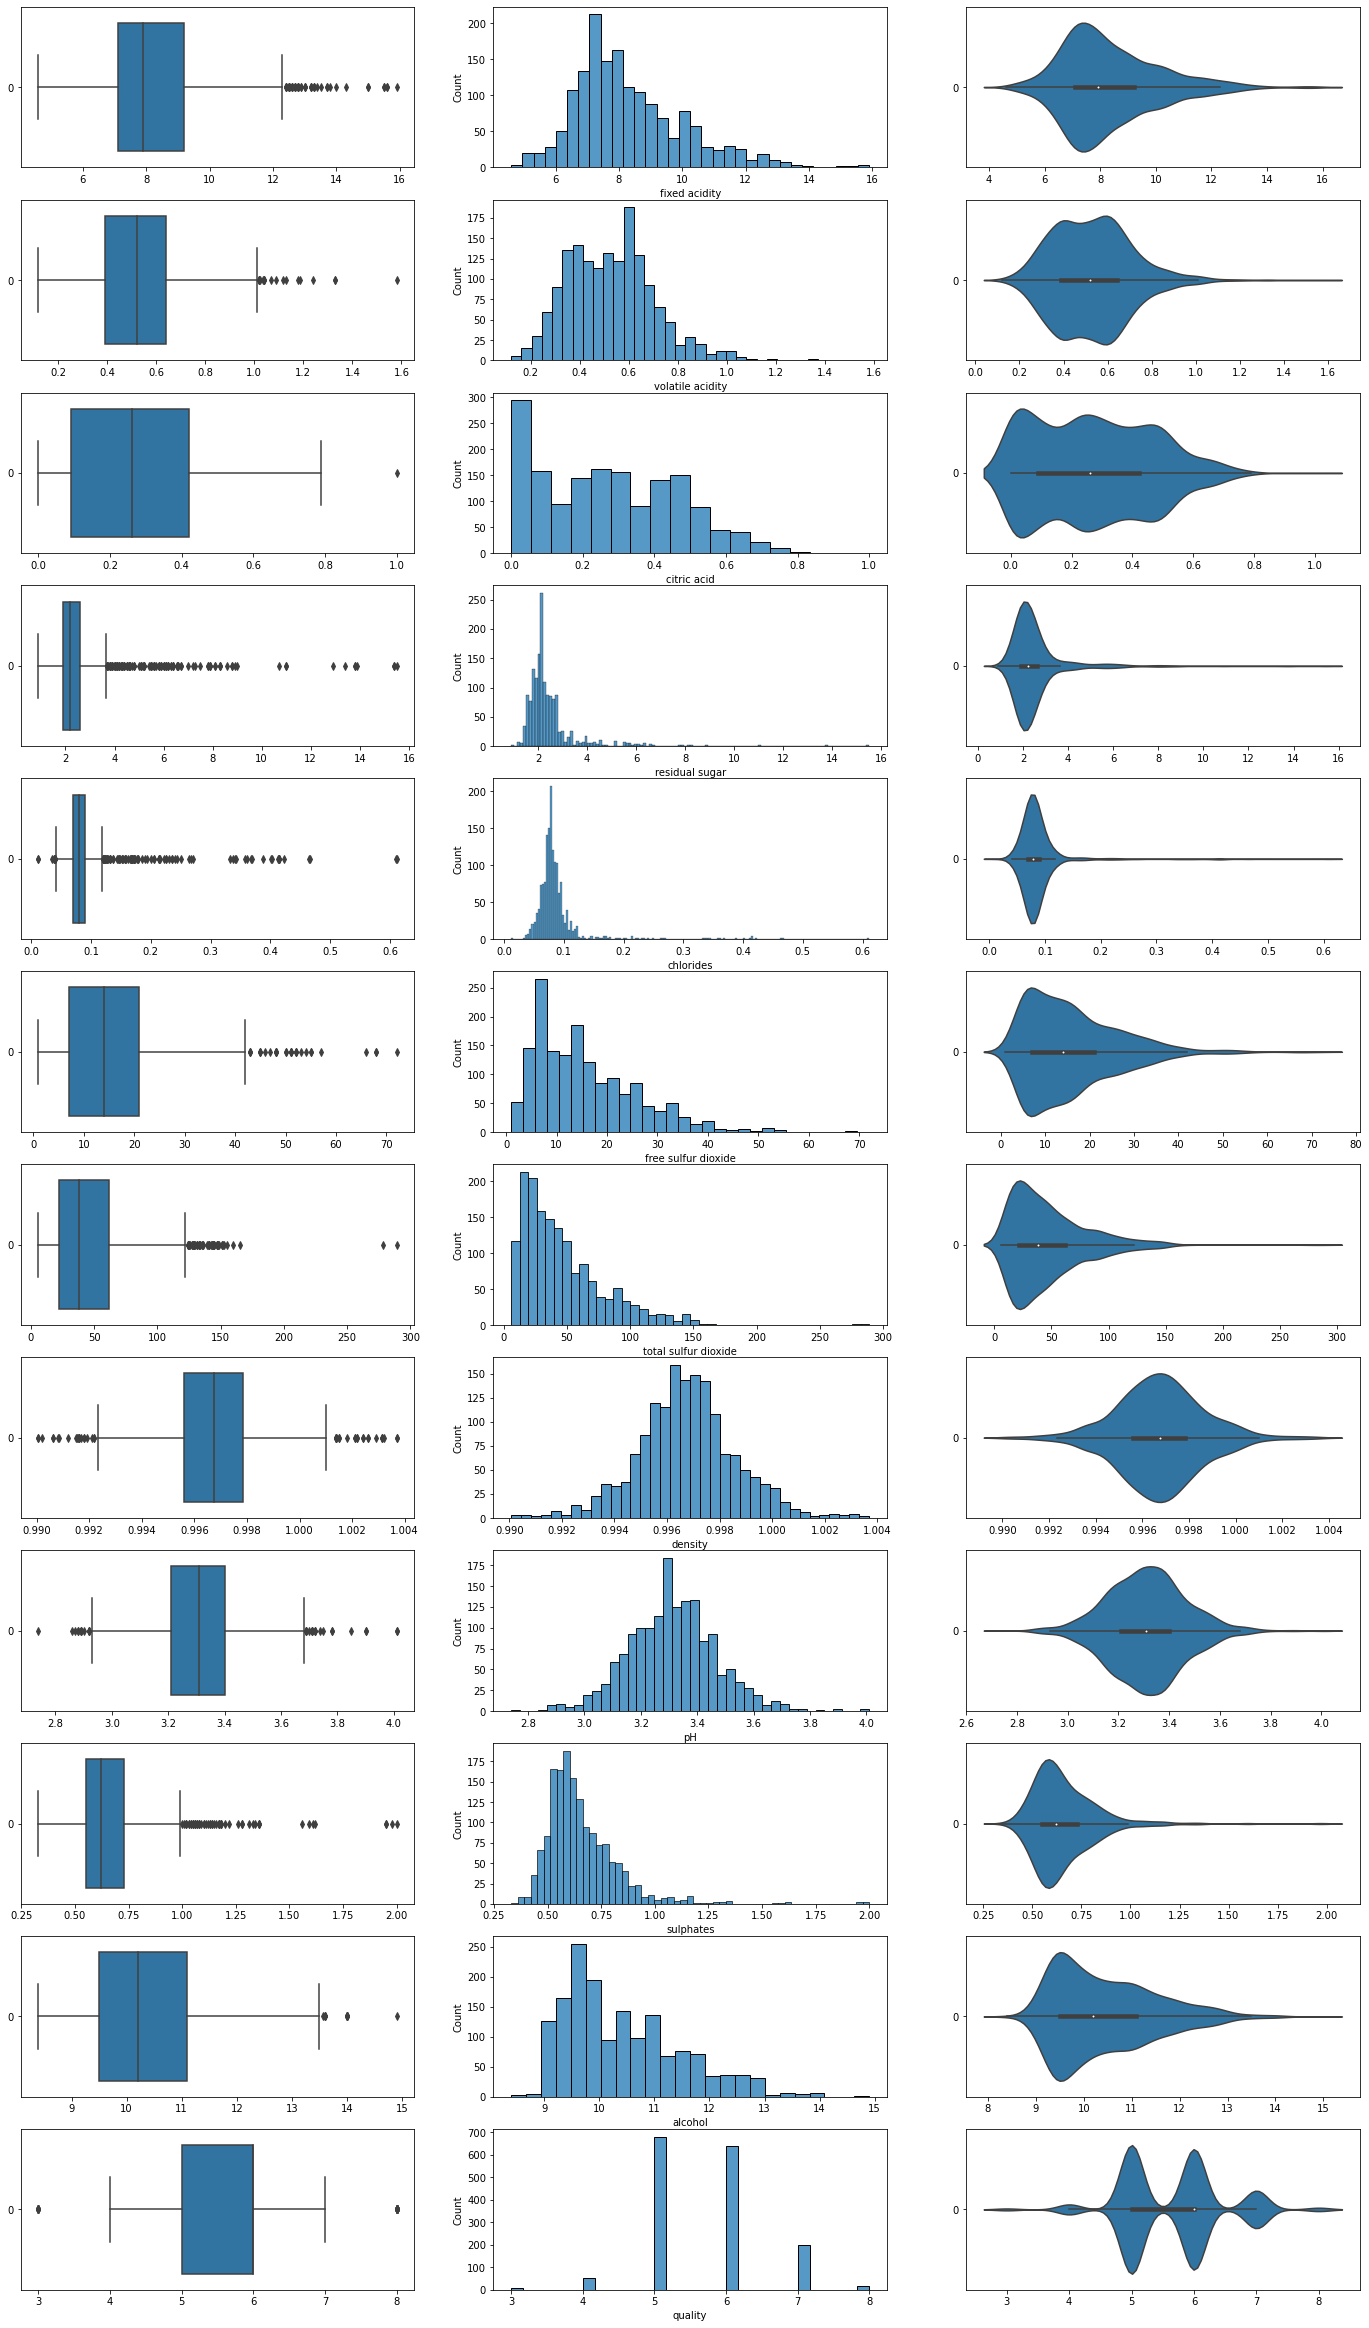

In [6]:
import matplotlib.pyplot as plt 
f, axes = plt.subplots(12, 3, figsize=(24, 42))

count = 0
for var in wineData:
    sb.boxplot(data = wineData[var], orient = "h", ax = axes[count,0])
    sb.histplot(data = wineData[var], ax = axes[count,1])
    sb.violinplot(data = wineData[var], orient = "h", ax = axes[count,2])
    count += 1

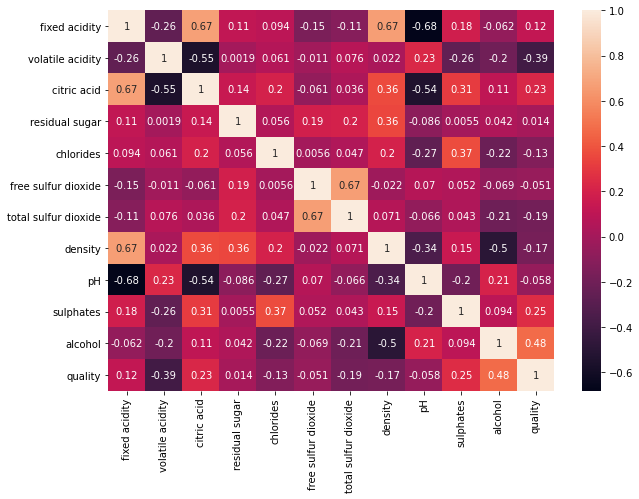

In [7]:
fig , ax = plt.subplots(figsize = (10,7))
sb.heatmap(wineData.corr() , annot = True , ax = ax)
plt.show()

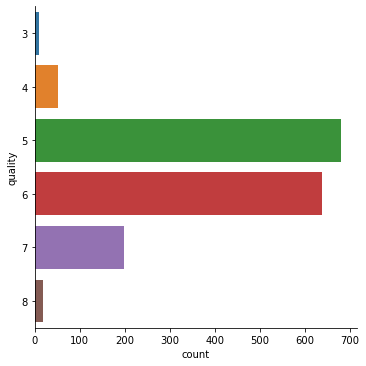

In [8]:
# Draw the distribution of Response
sb.catplot(y = "quality", data = wineData, kind = "count")

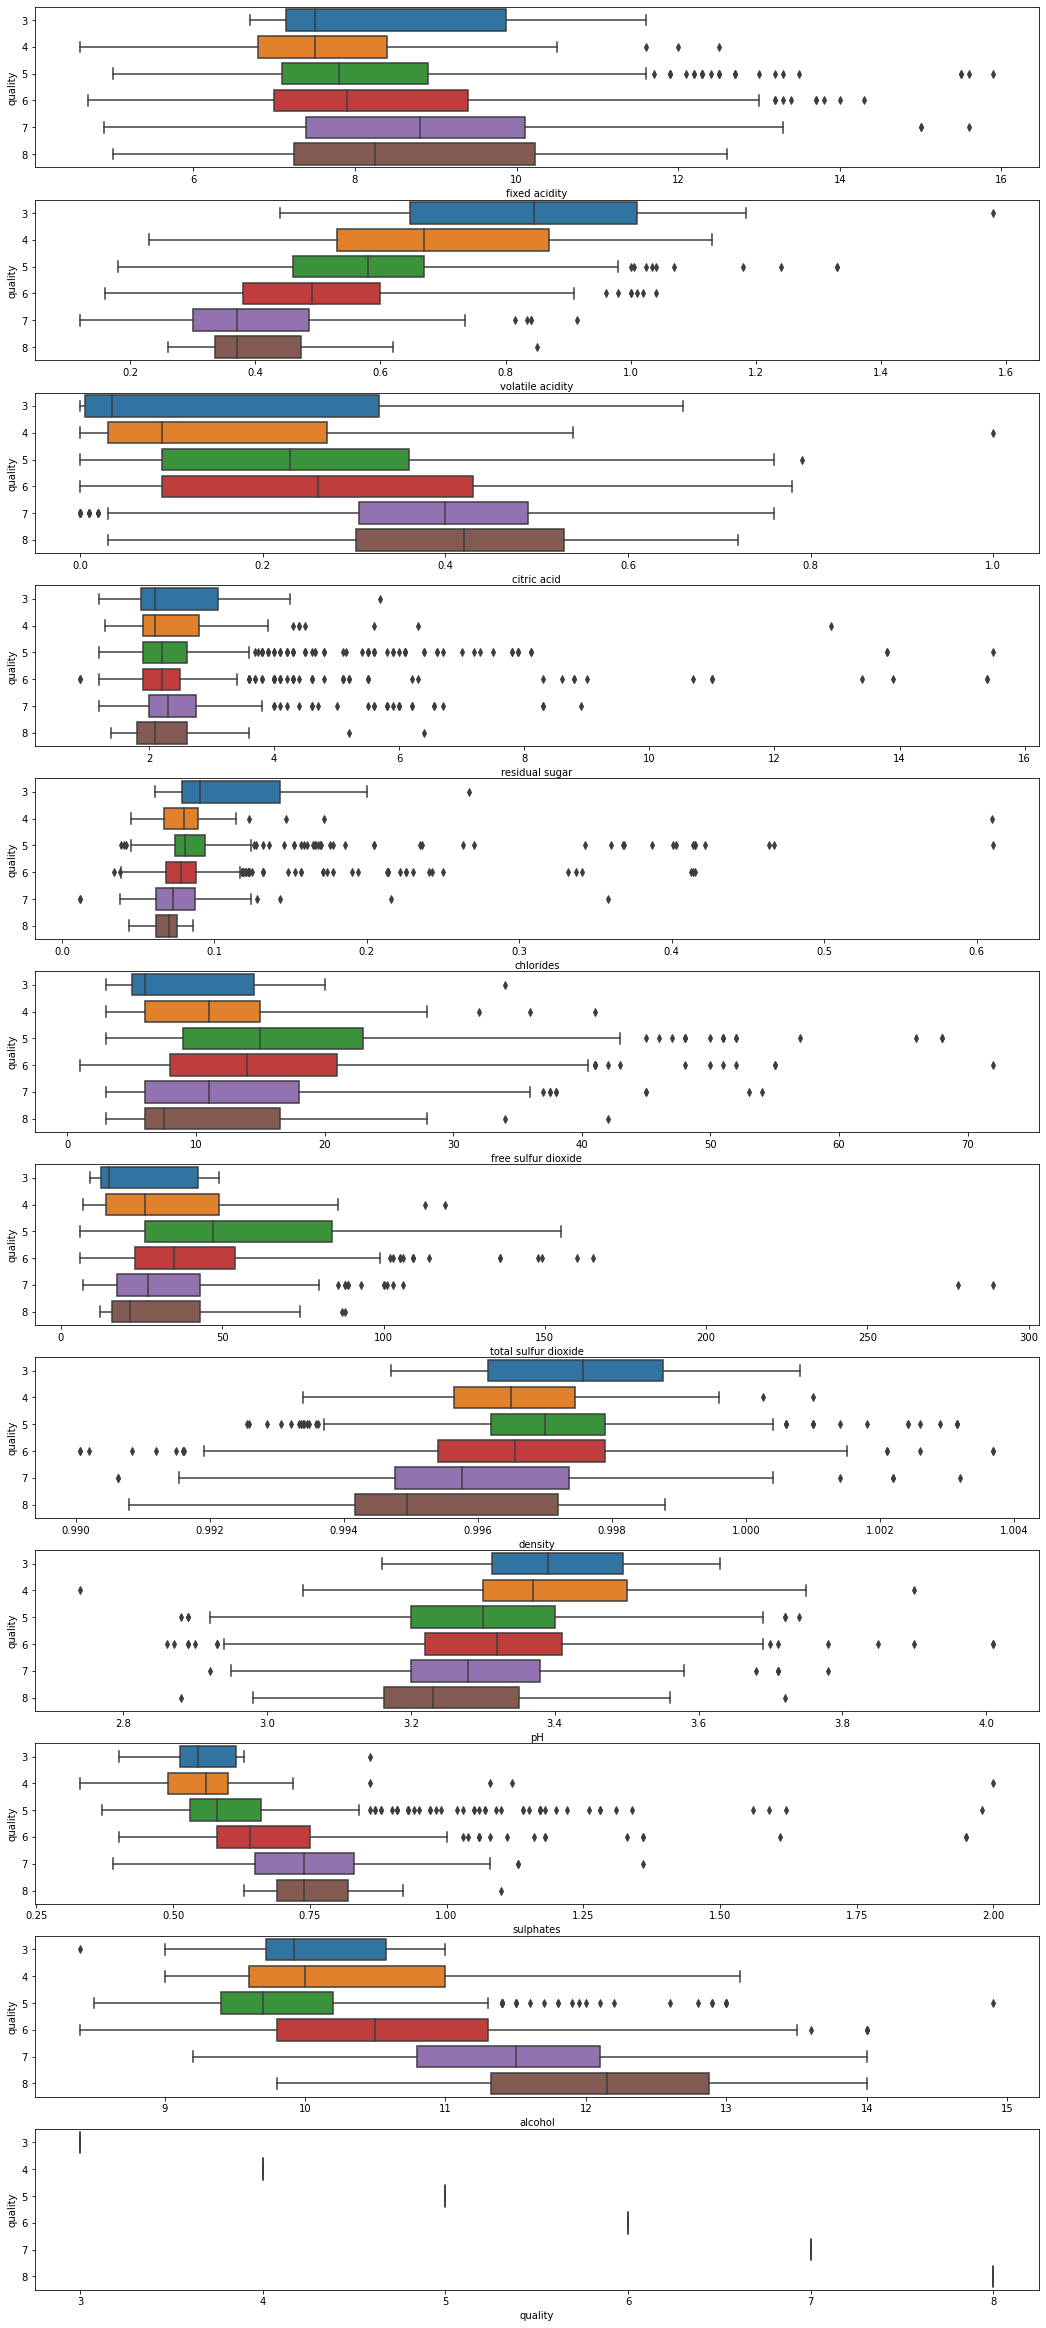

In [9]:
f, axes = plt.subplots(12, 1, figsize=(18, 42))

count = 0
for var in wineData:
    sb.boxplot(x = var, y = "quality", data = wineData, orient = "h", ax = axes[count])
    count += 1

In [10]:
#Removing outliers from dataset 
#IQR = Inter Quartile Range, Lower Whisker = q1-1.5*IQR, Upper Whisker = q2+1.5*IQR
q1=wineData.quantile(0.25)
q2=wineData.quantile(0.75)
IQR=q2-q1

wineData=wineData[((wineData<(q1-1.5*IQR))|(wineData>(q2+1.5*IQR))).any(axis=1)]

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.6279761904761905

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.5714285714285714



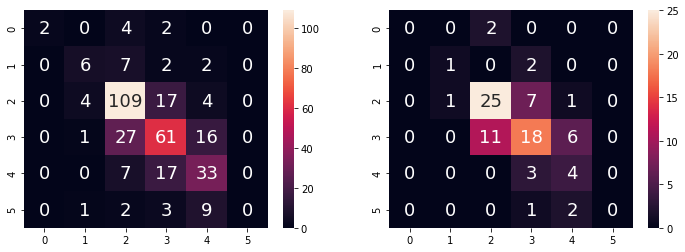

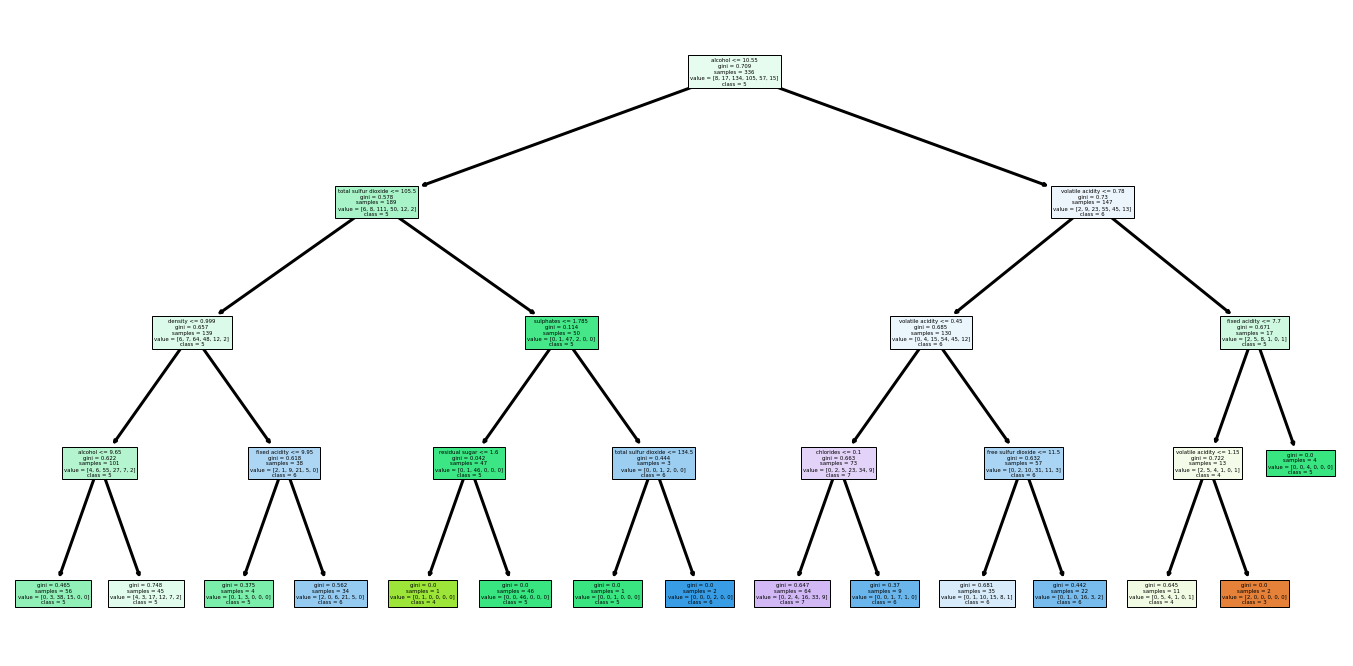

In [11]:
y = pd.DataFrame(wineData["quality"])
X = pd.DataFrame(wineData[["fixed acidity", "volatile acidity", "citric acid", "residual sugar", "chlorides", "free sulfur dioxide","total sulfur dioxide", "density", "pH", "sulphates", "alcohol"]])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 4)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])
from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(24, 12))
out = plot_tree(dectree, 
          feature_names = X_train.columns,
          class_names = [str(x) for x in dectree.classes_],
          filled=True)

for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(3)


In [12]:
wineData = wineData.reindex(columns=wineData.columns.tolist() + ['quality category'])
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
wineData['quality category'] = pd.cut(wineData['quality'], bins = bins, labels = group_names)
wineData.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality category
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5,bad
11,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5,bad
13,7.8,0.61,0.29,1.6,0.114,9.0,29.0,0.9974,3.26,1.56,9.1,5,bad
14,8.9,0.62,0.18,3.8,0.176,52.0,145.0,0.9986,3.16,0.88,9.2,5,bad
15,8.9,0.62,0.19,3.9,0.170,51.0,148.0,0.9986,3.17,0.93,9.2,5,bad


In [13]:
print("Quality of Red Wine: ",len(wineData["quality category"].unique()))

Quality of Red Wine:  2


bad     338
good     82
Name: quality category, dtype: int64


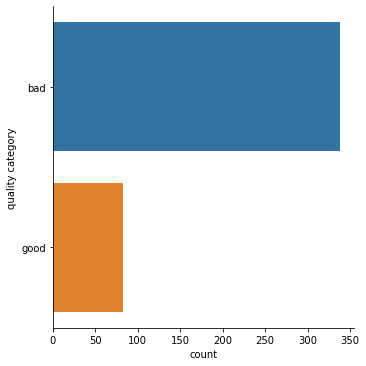

In [14]:
print(wineData["quality category"].value_counts())
sb.catplot(y = "quality category", data = wineData, kind = "count")


Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9107142857142857

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.8214285714285714



<AxesSubplot:>

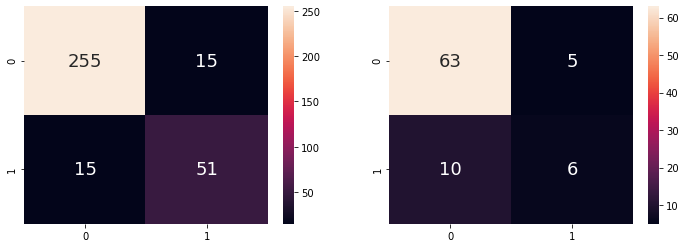

In [15]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Extract Response and Predictors
predictors = ["fixed acidity", "volatile acidity", "citric acid", "residual sugar", "chlorides", "free sulfur dioxide","total sulfur dioxide", "density", "pH", "sulphates", "alcohol", "sulphates"]

y = pd.DataFrame(wineData['quality category'])
X = pd.DataFrame(wineData[predictors]) 

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 4)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])


In [16]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

# Extract Response and Predictors
predictors = ["fixed acidity", "volatile acidity", "citric acid", "residual sugar", "chlorides", "free sulfur dioxide","total sulfur dioxide", "density", "pH", "sulphates", "alcohol", "sulphates"]

y = pd.DataFrame(wineData['quality category'])
X = pd.DataFrame(wineData[predictors]) 

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

X_pred=clf.predict(X_test)

<ipython-input-16-8576f3117417>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train,y_train)


In [17]:
X_train_pred=clf.predict(X_train)

In [18]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy Train:",metrics.accuracy_score(y_train, X_train_pred))

Accuracy Train: 1.0


In [19]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy Test:",metrics.accuracy_score(y_test, X_pred))

Accuracy Test: 0.8809523809523809


In [20]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=1, max_depth=12)
x = wineData.drop(['quality','quality category'] , axis = 1)
wd = pd.get_dummies(wineData) 
model.fit(x, wineData.quality)
display(model.feature_importances_)

array([0.04643773, 0.16682491, 0.04736226, 0.05942757, 0.06393822,
       0.03519095, 0.07963248, 0.05007128, 0.05580695, 0.12952725,
       0.26578041])

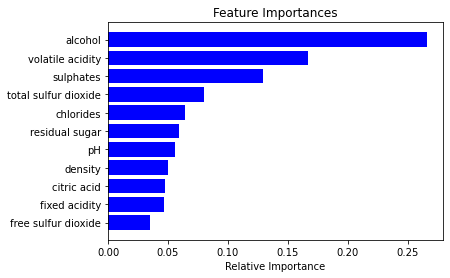

In [21]:
features = wd.columns
importances = model.feature_importances_
indices = np.argsort(importances)[:]
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()